In [1]:
train_dir= '/kaggle/input/fer2013plus/fer2013plus/fer2013/train'
test_dir= '/kaggle/input/fer2013plus/fer2013plus/fer2013/test'

In [1]:
import glob
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf
import cv2
from keras.preprocessing.image import ImageDataGenerator
from keras.models import Sequential, load_model
from keras.layers import Conv2D,GlobalAveragePooling2D,MaxPooling2D,Flatten,Dropout,BatchNormalization,Dense
from keras.applications import InceptionV3,DenseNet201,VGG16,VGG19,Xception,ResNetRS420,DenseNet121
from keras import optimizers
import warnings
warnings.filterwarnings('ignore')

In [3]:
train_datagen= ImageDataGenerator(
    rotation_range=20,
    width_shift_range=0.1,
    height_shift_range=0.1,
    shear_range=0.1,
    zoom_range=0.1,
    fill_mode='nearest',
    horizontal_flip=False,
    vertical_flip=False,
    rescale=1./255,
    validation_split=0.2)

val_datagen= ImageDataGenerator(rescale=1./255,validation_split=0.2)

In [4]:
train_generator= train_datagen.flow_from_directory(train_dir,
    target_size=(128,128),
    color_mode='grayscale',
    class_mode='categorical',
    batch_size=100,
    shuffle=True,
    subset= 'training')
val_generator= val_datagen.flow_from_directory(train_dir,
    target_size=(128,128),
    color_mode='grayscale',
    class_mode='categorical',
    batch_size=100,
    shuffle=True,
    subset= 'validation')

FileNotFoundError: [WinError 3] The system cannot find the path specified: '/kaggle/input/fer2013plus/fer2013plus/fer2013/train'

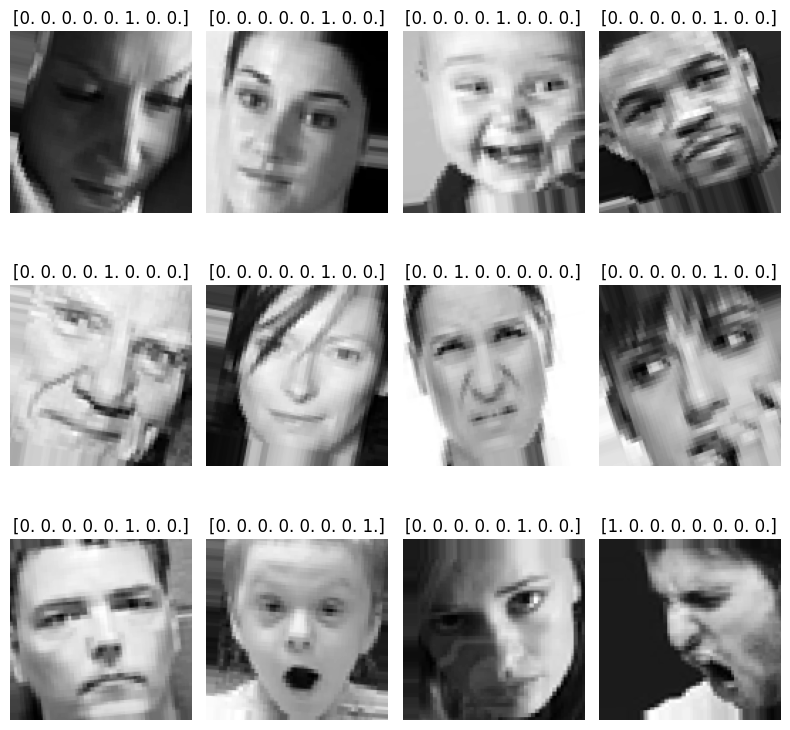

In [ ]:
batch_images, batch_labels = train_generator.next()
plt.figure(figsize=(8,8))
for i in range (12):
    plt.subplot(3,4,i+1)
    plt.imshow(batch_images[i],cmap='gray') 
    plt.title(batch_labels[i])
    plt.axis('off')  
plt.tight_layout()
plt.show()

In [ ]:
# base_model= DenseNet201(include_top=False, weights='imagenet', input_shape=(48, 48, 1))


In [ ]:
# Freeze the layers of the base model
# for layer in base_model.layers:
#     layer.trainable = False


In [ ]:
model = Sequential()

model.add(Conv2D(32, kernel_size=(3, 3), activation='relu', input_shape=(128,128,1)))
model.add(BatchNormalization())

model.add(Conv2D(64, kernel_size=(3, 3), activation='relu'))
model.add(BatchNormalization())

model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

model.add(Conv2D(128, kernel_size=(3, 3), activation='relu'))
model.add(BatchNormalization())

model.add(Conv2D(128, kernel_size=(3, 3), activation='relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

model.add(Conv2D(256, kernel_size=(3, 3), activation='relu'))
model.add(BatchNormalization())

model.add(Conv2D(256, kernel_size=(3, 3), activation='relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))


model.add(Conv2D(64, (3, 3), padding="same", activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Conv2D(96, (3, 3), dilation_rate=(2, 2), activation='relu', padding="same"))
model.add(Conv2D(96, (3, 3), padding="same", activation='relu'))



model.add(Flatten())

model.add(Dense(256, activation='relu'))
model.add(BatchNormalization())
model.add(Dropout(0.5))
model.add(Dense(8, activation='softmax'))


In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 126, 126, 32)      320       
                                                                 
 batch_normalization (Batch  (None, 126, 126, 32)      128       
 Normalization)                                                  
                                                                 
 conv2d_1 (Conv2D)           (None, 124, 124, 64)      18496     
                                                                 
 batch_normalization_1 (Bat  (None, 124, 124, 64)      256       
 chNormalization)                                                
                                                                 
 max_pooling2d (MaxPooling2  (None, 62, 62, 64)        0         
 D)                                                              
                                                        

In [ ]:
# lr_schedule= optimizers.schedules.ExponentialDecay(initial_learning_rate=0.0001,
#                                                  decay_steps=1000,
#                                                  decay_rate=0.5)

# model.compile(optimizer=optimizers.Adam(learning_rate=lr_schedule),loss= 'categorical_crossentropy', metrics=['accuracy'])

In [ ]:
# history=model.fit(train_generator,epochs=30,steps_per_epoch=50,verbose=1,validation_data=val_generator)

In [ ]:
model.compile(loss="categorical_crossentropy", optimizer= tf.keras.optimizers.Adam(lr=0.0001), metrics=['accuracy'])

In [ ]:
from tensorflow.keras.callbacks import ModelCheckpoint

# Define the callback
checkpoint_callback = ModelCheckpoint(
    filepath='model_weights.h5',
    monitor='val_accuracy',
    save_best_only=True,
    save_weights_only=True,
    mode='max',
    verbose=1
)

# Train the model with the callback
history = model.fit(
    train_generator,
    steps_per_epoch=len(train_generator),
    epochs=50,
    validation_data=val_generator,
    validation_steps=len(val_generator),
    callbacks=[checkpoint_callback]
)

Epoch 1/50


2023-12-12 13:55:45.533632: E tensorflow/core/grappler/optimizers/meta_optimizer.cc:954] layout failed: INVALID_ARGUMENT: Size of values 0 does not match size of permutation 4 @ fanin shape insequential/dropout/dropout/SelectV2-2-TransposeNHWCToNCHW-LayoutOptimizer


228/228 [==============================] - ETA: 0s - loss: 1.7431 - accuracy: 0.4132
Epoch 1: val_accuracy improved from -inf to 0.36341, saving model to model_weights.h5
228/228 [==============================] - 184s 737ms/step - loss: 1.7431 - accuracy: 0.4132 - val_loss: 1.7760 - val_accuracy: 0.3634
Epoch 2/50
228/228 [==============================] - ETA: 0s - loss: 1.2229 - accuracy: 0.5724
Epoch 2: val_accuracy improved from 0.36341 to 0.42457, saving model to model_weights.h5
228/228 [==============================] - 69s 301ms/step - loss: 1.2229 - accuracy: 0.5724 - val_loss: 1.6595 - val_accuracy: 0.4246
Epoch 3/50
228/228 [==============================] - ETA: 0s - loss: 1.0316 - accuracy: 0.6398
Epoch 3: val_accuracy improved from 0.42457 to 0.52062, saving model to model_weights.h5
228/228 [==============================] - 69s 303ms/step - loss: 1.0316 - accuracy: 0.6398 - val_loss: 1.3735 - val_accuracy: 0.5206
Epoch 4/50
228/228 [==============================] - ET

In [ ]:
test_datagen= ImageDataGenerator(rescale=1./255)

test_generator= test_datagen.flow_from_directory(test_dir, 
                                                 target_size=(128,128),
                                                 color_mode='grayscale',
                                                 class_mode='categorical',
                                                 batch_size=32,
                                                 shuffle=True)

Found 7099 images belonging to 8 classes.


In [ ]:
model.evaluate_generator(test_generator,verbose=1)

222/222 [==============================] - 31s 136ms/step - loss: 23.7957 - accuracy: 0.8014


[23.795665740966797, 0.801380455493927]

In [ ]:
# model.save('fer2013plus.h5')

In [ ]:
import cv2
import numpy as np
from keras.models import load_model

# Load the trained model
model = load_model('fer2013plus.h5')

# Define emotion labels
emotion_labels = ["Anger", "Contempt", "Disgust", "Fear", "Happiness", "Neutral", "Sadness", "Surprise"]

# Load the Haar Cascade Classifier for face detection
face_cascade = cv2.CascadeClassifier(cv2.data.haarcascades + 'haarcascade_frontalface_default.xml')

# Start the video capture
cap = cv2.VideoCapture(0)  # Use 0 for the default camera, you may need to change it based on your setup

while True:
    # Read a frame from the video capture
    ret, frame = cap.read()

    # Convert the frame to grayscale
    gray_frame = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)

    # Detect faces in the frame
    faces = face_cascade.detectMultiScale(gray_frame, scaleFactor=1.3, minNeighbors=5, minSize=(30, 30))

    # If faces are detected, process each face
    for (x, y, w, h) in faces:
        # Crop the face region
        face_roi = gray_frame[y:y + h, x:x + w]

        # Resize the face region to 48x48 pixels
        resized_face = cv2.resize(face_roi, (48, 48))
        
        # Normalize pixel values to be in the range [0, 1]
        normalized_face = resized_face / 255.0

        # Add a batch dimension and channel dimension to the face
        processed_face = np.expand_dims(np.expand_dims(normalized_face, axis=-1), axis=0)

        # Make predictions using the model
        predictions = model.predict(processed_face)
        
        # Draw a rectangle around the face and display the predicted emotion
        predicted_emotion_index = np.argmax(predictions)
        predicted_emotion = emotion_labels[predicted_emotion_index]

        # Draw a rectangle around the face and display the predicted emotion
        cv2.rectangle(frame, (x, y), (x + w, y + h), (255, 0, 0), 2)
        cv2.putText(frame, predicted_emotion, (x, y - 10), cv2.FONT_HERSHEY_SIMPLEX, 0.9, (255, 0, 0), 2, cv2.LINE_AA)

    # Display the frame
    cv2.imshow('Emotion Detection', frame)

    # Break the loop if 'q' key is pressed
    if cv2.waitKey(1) & 0xFF == ord('q'):
        break

# Release the video capture object and close the window
cap.release()
cv2.destroyAllWindows()


: 